In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
import PIL
import matplotlib.image as mpimg
from matplotlib import image

import os

C:\Users\m.alvarezg1\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\m.alvarezg1\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\m.alvarezg1\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [6]:
ruta = "E:/TesisMA/Datos/DataCombinada/living_room/Apartamento708_1.jpg"
img = cv2.imread(ruta,0)
equ = cv2.equalizeHist(img)

In [31]:
clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8))
cl_img = clahe.apply(img)

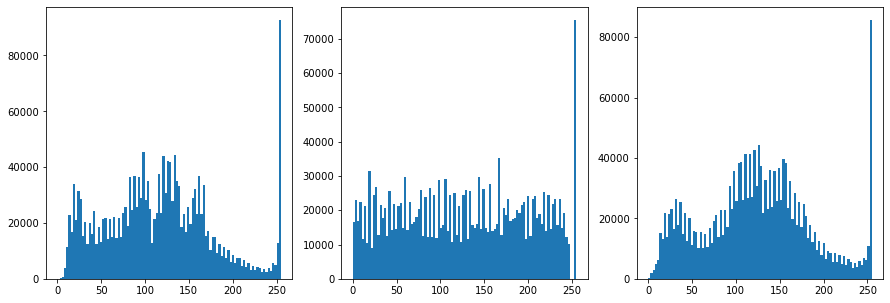

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.hist(img.flat, bins=100, range=(0, 255));
ax2.hist(equ.flat, bins=100, range=(0, 255));
ax3.hist(cl_img.flat, bins=100, range=(0, 255));

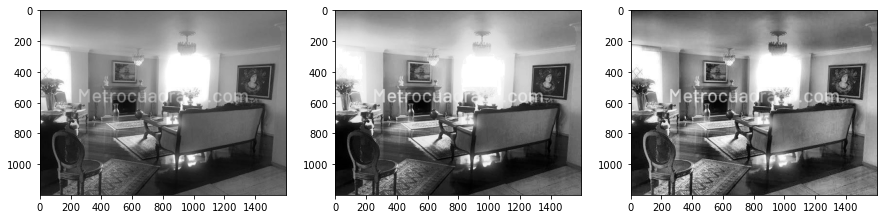

In [33]:
fig, axes = plt.subplots(1,3, figsize=(15,15))
axes[0].imshow(PIL.Image.fromarray(img, 'L'),cmap="gray");
axes[1].imshow(PIL.Image.fromarray(equ, 'L'),cmap="gray");
axes[2].imshow(PIL.Image.fromarray(cl_img, 'L'),cmap="gray");

### CLAHE para color

In [4]:
def improve_contrast_image_using_clahe(bgr_image: np.array) -> np.array:
    hsv = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    hsv_planes = cv2.split(hsv)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    hsv_planes[2] = clahe.apply(hsv_planes[2])
    hsv = cv2.merge(hsv_planes)

    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

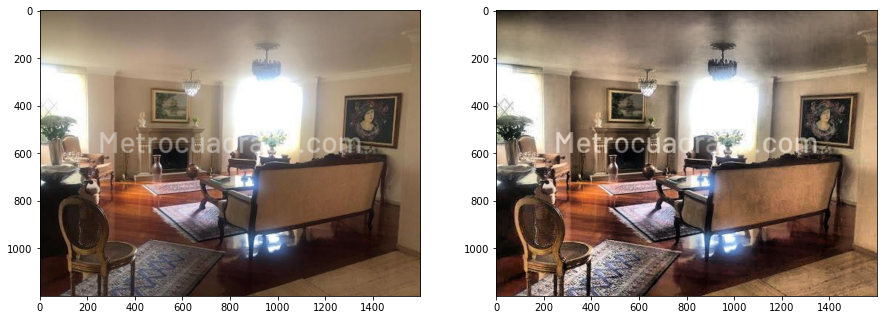

In [7]:
im = image.imread(ruta)
fig, axes = plt.subplots(1,2, figsize=(15,15))
axes[0].imshow(im);
axes[1].imshow(improve_contrast_image_using_clahe(im));

### CLAHE para el dataset

In [8]:
import os

CLAHE para carpeta de entrenamiento

In [ ]:
path="E:/TesisMA/Datos/DataCombinada/"
new_path ="E:/TesisMA/Datos/DataCLAHE/"
os.chdir(path)
folders = os.listdir()
for f in folders:
    path_in = path+f
    os.chdir(path_in)
    files= os.listdir()
    for i in files:
        try:
            path_image=path_in+"/"+i
            img = image.imread(path_image)
            array=improve_contrast_image_using_clahe(img)
            im = PIL.Image.fromarray(array)
            im.save(new_path+f+"/"+i)
        except Exception:
            pass

CLAHE para carpeta de prueba

In [10]:
path="E:/TesisMA/Datos/DataPrueba/"
new_path ="E:/TesisMA/Datos/DataPruebaCLAHE/"
os.chdir(path)
properties = os.listdir()
for p in properties:
    path_in = path+p
    os.mkdir(new_path+p)
    os.chdir(path_in)
    folders= os.listdir()
    for f in folders:
        path_folders = path_in+"/"+ f
        os.mkdir(new_path+p+"/"+f)
        os.chdir(path_folders)
        files= os.listdir()
        for i in files:
            path_image=path_folders+"/"+i
            img = image.imread(path_image)
            array=improve_contrast_image_using_clahe(img)
            im = PIL.Image.fromarray(array)
            im.save(new_path+ p+ "/" + f + "/" + i)

### Comparación de imagenes

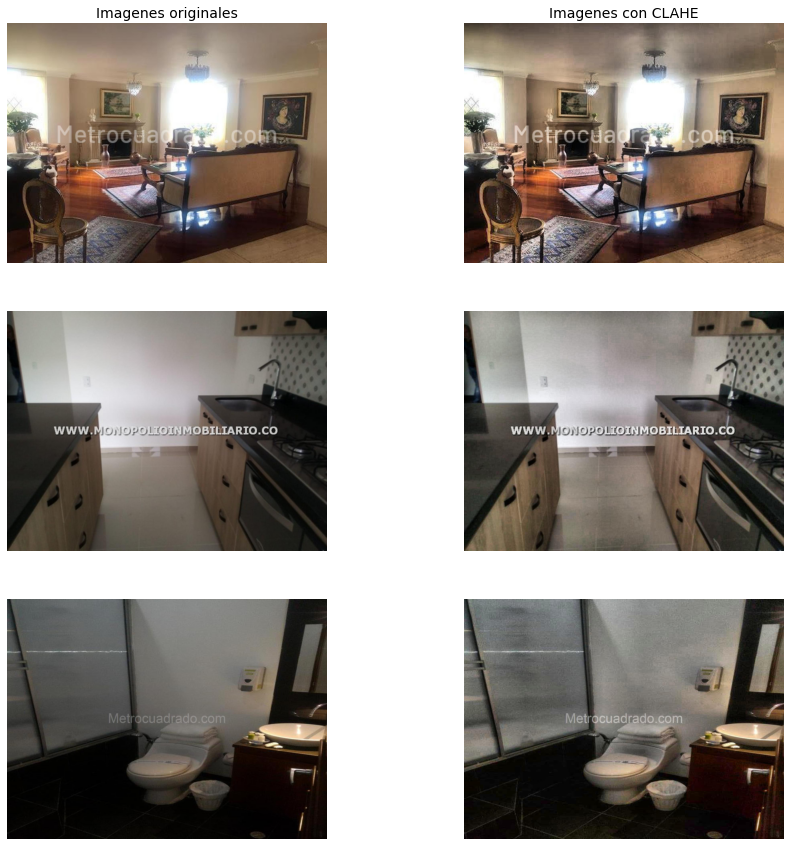

In [3]:
ruta1 = "E:/TesisMA/Datos/DataCombinada/living_room/Apartamento708_1.jpg"
ruta2 = "E:/TesisMA/Datos/DataCLAHE/living_room/Apartamento708_1.jpg"
ruta3 = "E:/TesisMA/Datos/DataCombinada/kitchen/Apartamento370_11.jpg"
ruta4 = "E:/TesisMA/Datos/DataCLAHE/kitchen/Apartamento370_11.jpg"
ruta5 = "E:/TesisMA/Datos/DataCombinada/bathroom/Apartamento668_7.jpg"
ruta6 = "E:/TesisMA/Datos/DataCLAHE/bathroom/Apartamento668_7.jpg"

fig, axes = plt.subplots(3,2, figsize=(15,15))
axes[0][0].imshow(image.imread(ruta1))
axes[0][0].set_title("Imagenes originales",fontsize = 14)
axes[0][0].axis("off")


axes[0][1].imshow(image.imread(ruta2))
axes[0][1].set_title("Imagenes con CLAHE",fontsize = 14)
axes[0][1].axis("off")

axes[1][0].imshow(image.imread(ruta3))
axes[1][0].axis("off")

axes[1][1].imshow(image.imread(ruta4))
axes[1][1].axis("off")

axes[2][0].imshow(image.imread(ruta5))
axes[2][0].axis("off")

axes[2][1].imshow(image.imread(ruta6))
axes[2][1].axis("off")

plt.show();